# Phase 2 Project Office Hours

## Building an Evaluation Function

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
X = df.drop(columns='price')
y = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
lr_simple = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [7]:
lr_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:34:25   Log-Likelihood:            -2.0115e+05
No. Observations:               14469   AIC:                         4.023e+05
Df Residuals:                   14467   BIC:                         4.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.381e+04   5413.377     -8.092      0.000   -5.44e+04   -3.32e+04
sqft_living   280.6078      2.370    118.383      0.000     275.962     285.254
==============================================================================
Omnibus:                     9406.447   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265707.063
Skew:                           2.688   Prob(JB):                         0.00
Kurtosis:                      23.293   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
train_preds = lr_simple.predict(sm.add_constant(X_train['sqft_living']))
test_preds = lr_simple.predict(sm.add_constant(X_test['sqft_living']))

In [9]:
# Evaluate
print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
print(f"Test MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
print(f"Test RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")

Train R2 Score: 0.4921
Train MAE Score: $174976.6448
Train RMSE Score: $263814.9793
********************
Test R2 Score: 0.4939
Test MAE Score: $171265.2336
Test RMSE Score: $257215.7808


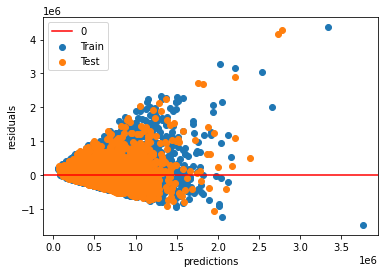

In [10]:
# visualize residuals
plt.scatter(train_preds, y_train-train_preds, label='Train')
plt.scatter(test_preds, y_test-test_preds, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

In [20]:
def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
    I EXPECT YOU TO WRITE A GOOD DOCSTRING HERE
    '''
    # Create and fit model
    model = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    
    
    # Print summary (if OLS)
    print(model.summary)
    
    
    # Grab predictions
    tr_preds = model.predict(sm.add_constant(X_tr))
    te_preds = model.predict(sm.add_constant(X_te))
    
    
    # Evaluate on train and test 
    print("*"*20)
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else: 
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True: 
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds) 
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds_unlog, squared=False):.4f}")
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")
    print("*"*20)
    # Visualize residuals 
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    return tr_preds, te_preds

In [15]:
X_tr_2 = X_train[['bedrooms', 'sqft_living']]
X_te_2 = X_test[['bedrooms', 'sqft_living']]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_tr_2)

X_tr_2_scaled = scaler.transform(X_tr_2)
X_te_2_scaled = scaler.transform(X_te_2)

In [19]:
y_tr_log = np.log1p(y_train)
y_te_log = np.log1p(y_test)

In [ ]:
evalute_model(X_tr_2_scaled,X_te_2_scaled, y_tr_log, y_te_log)

## 3D Visualizations With Plotly

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='sqft_living', y='bathrooms', z='price')
fig.show()